In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch data, pick features/target, split into training/test data, decide seed
housing = fetch_california_housing(as_frame=True).frame
features = housing[['MedInc', 'AveRooms', 'Latitude', 'Longitude']]
target = housing['MedHouseVal']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3, random_state = 964)
seed = 964

# Get model and train it
random_forest_model = RandomForestRegressor(random_state=seed)
random_forest_model.fit(features_train, target_train)

# Check accuracy through RMSE
target_predictions = random_forest_model.predict(features_test)
RMSE = mean_squared_error(target_test, target_predictions, squared=False)
avg_error = round(RMSE * 100000, 2)
print(f"On average, house estimation values are ${avg_error:.2f} off.")

On average, house estimation values are $48594.87 off.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


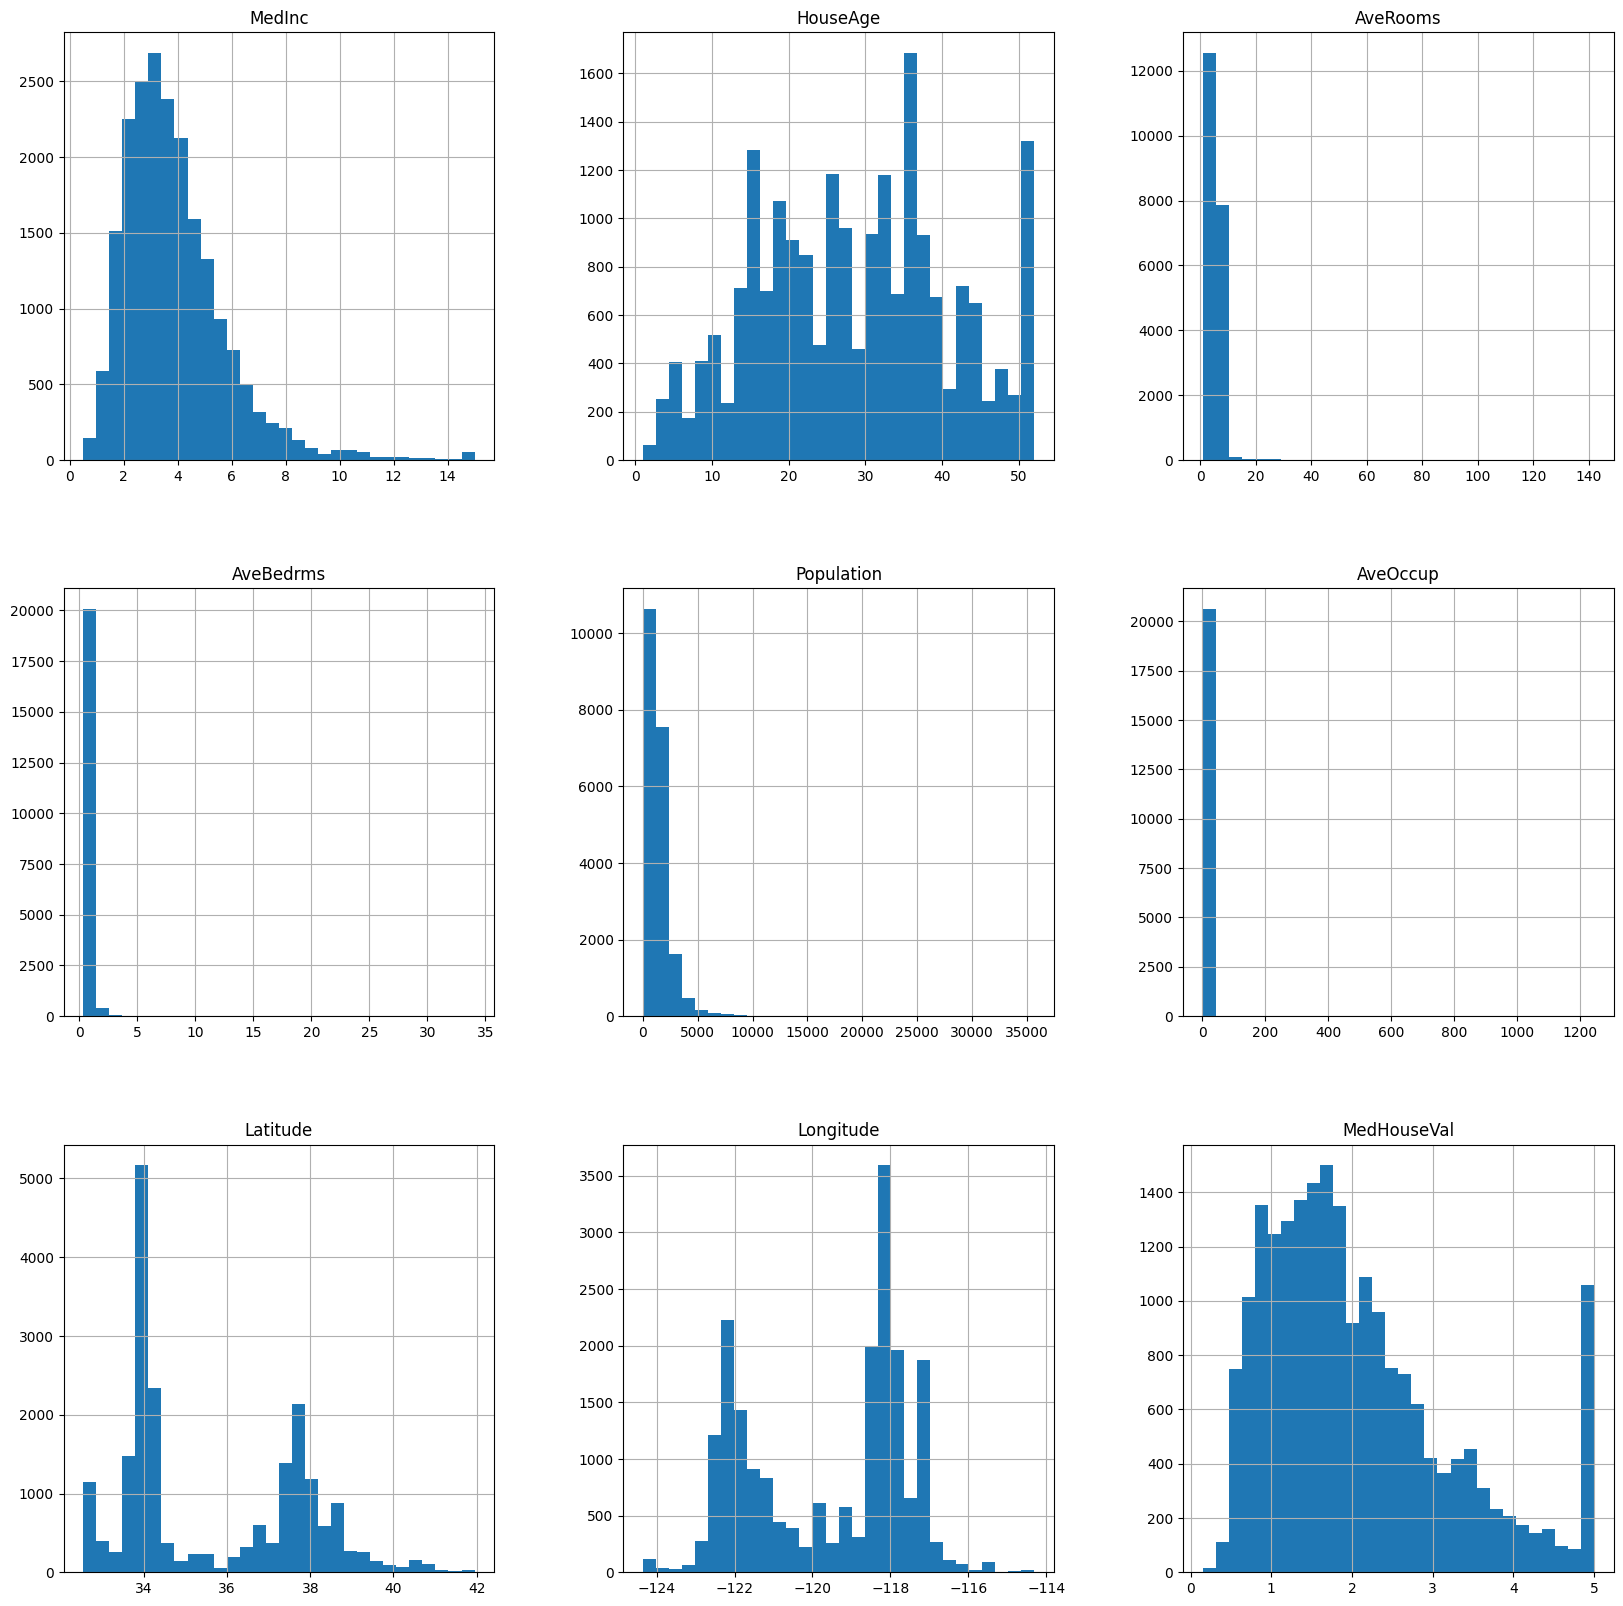

In [2]:
# Visualize data spread with histograms
housing.hist(bins = 30, figsize = (20, 20));
# Statistical summary of the data
housing.describe()

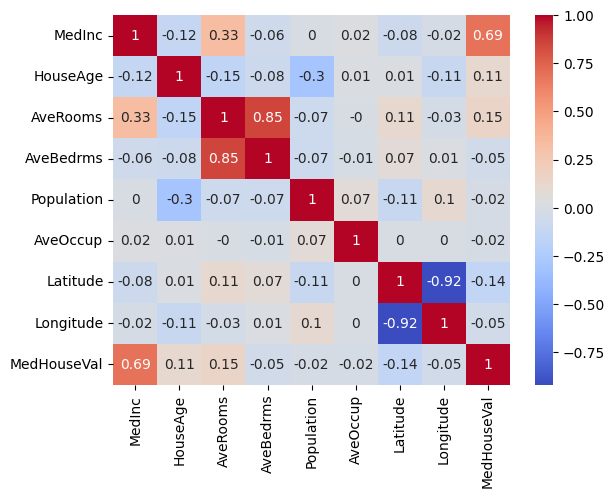

In [3]:
# Visualize correlations with a heatmap
correlation_matrix = housing.corr().round(2)
sns.heatmap(data=correlation_matrix,cmap='coolwarm',annot=True);

           importance
feature              
MedInc           0.53
Longitude        0.20
Latitude         0.19
AveRooms         0.08


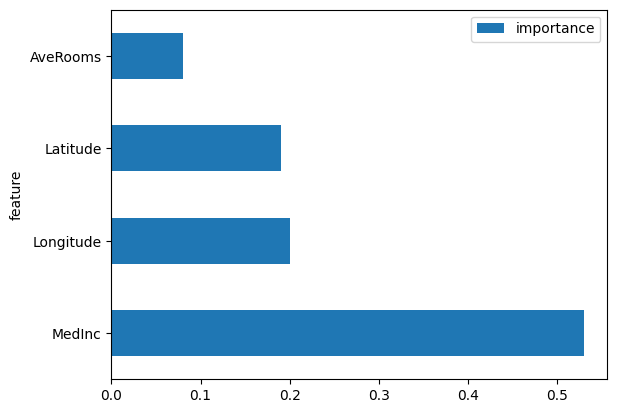

In [4]:
# Visualize feature importance for random forest regression model with a bar graph
importances = random_forest_model.feature_importances_
importances = pd.DataFrame({'feature': features.columns, 'importance': np.round(importances, 2)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.plot.barh();
print(importances)

In [5]:
def get_user_input():
    while True:
        try:
            rooms = float(input("Enter number of rooms: "))
            if rooms < 0:
                raise ValueError("Number of rooms can't be negative.")
            break
        except ValueError as e:
            print(f"Error: {e}")

    while True:
        try:
            lat = float(input("Enter latitude(32.5 - 42): "))
            if lat < 32.5 or lat > 42:
                raise ValueError("Latitude must be between 32.5 and 42.")
            break
        except ValueError as e:
            print(f"Error: {e}")

    while True:
        try:
            lng = float(input("Enter longitude(-124.65 - -114.13): "))
            if lng < -124.65 or lng > -114.13:
                raise ValueError("Longitude must be between -124.65 and -114.13.")
            break
        except ValueError as e:
            print(f"Error: {e}")

    while True:
        try:
            income = float(input("Enter yearly income of current/previous household: "))
            if income < 0:
                raise ValueError("Income can't be negative.")
            break
        except ValueError as e:
            print(f"Error: {e}")

    return rooms, lat, lng, income / 10000

In [6]:
def predict_property_value():
    rooms, lat, lng, income = get_user_input()
    user_input = pd.DataFrame({'MedInc': [income], 'AveRooms': [rooms], 'Latitude': [lat], 'Longitude': [lng]})
    prediction = random_forest_model.predict(user_input)
    print(f"Your house is estimated to be worth ${prediction[0] * 100000:.2f} dollars.")

In [ ]:
# Run this cell by clicking on it, then clicking "Run" or clicking shift + enter
predict_property_value()